In [1]:
from PIL import Image
from io import BytesIO
import os, sys, requests, json, random, math, imageio, shutil, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
# sys.path.append('/data/users/g6114450078/ัyolov3/preprocessing')
# from aug import *

1 https://raw.githubusercontent.com/RTANC/malaria_dataset/master/tmp_images/0000015250.jpg
pf-train-0000000001
1


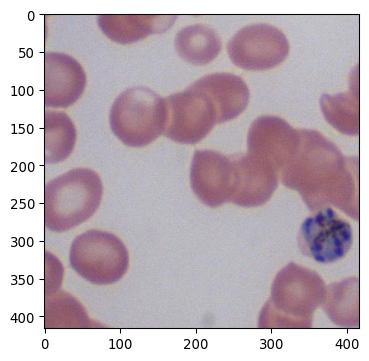

In [12]:
# get images from pf_ext
# labels = os.path.join('Pf_ext_01.json')

count = 1
phase_count = {
    "train": 1,
    "test": 1
}

phase = "train"
degs = [45,90,135,180,225,270,315]

data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/Pf_ext_01.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0 and count <= 20:
        name = "pf-" + phase + "-{:010d}".format(phase_count[phase])
        print("{} {}".format(count,url))
        print(name)
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
#         img.save(os.path.join('../data/custom/images',name+".jpg"))
#         f = open(os.path.join('../data/custom/labels',name+".txt"),'w')
        rects = []
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            x1 = b["x"]/w
            y1 = b["y"]/h
            bw = b["width"]/w
            bh = b["height"]/h
            xc = x1 + (bw/2)
            yc = y1 + (bh/2)
            lbl = box["region_attributes"]["type"]
            if lbl == "2":
                lbl = "1"
            elif lbl == "1":
                lbl = "0"
            rects.append(BoundingBox(x1=b["x"],y1=b["y"],x2=(b["x"] + b["width"]),y2=(b["y"] + b["height"]),label=lbl))
            
        img = np.array(img)
        bbs = BoundingBoxesOnImage(rects,shape=img.shape)
        for bb in bbs:
            if bb.label == "1":
                xc = bb.x1 / w
                yc = bb.y1 / h
                img_aug, bbs_aug = iaa.CropToFixedSize(width=416, height=416, position=(xc, yc))(image=img, bounding_boxes=bbs)
                ia.imshow(img_aug)
                clip_off_bbs = bbs_aug.remove_out_of_image(fully=True,partly=False).clip_out_of_image()
                break
        break
        
#         bboxs = bboxs[1:]
#         f.write(bboxs)
#         f.close()
        
#         count += 1
#         phase_count[phase] += 1
        
#         phase_count = rotate(img=img,bbs=bbs,specie="pf",offset=15,phase_count=phase_count)
        
#         aug_hor, bbs_hor, phase_count = flipHor(img=img,bbs=bbs,specie="pf",phase_count=phase_count)
#         phase_count = rotate(img=aug_hor,bbs=bbs_hor,specie="pf",offset=15,phase_count=phase_count)
        
#         aug_ver, bbs_ver, phase_count = flipVer(img=aug_hor,bbs=bbs_hor,specie="pf",phase_count=phase_count)
#         phase_count = rotate(img=aug_ver,bbs=bbs_ver,specie="pf",offset=15,phase_count=phase_count)
        
#         aug_ver2, bbs_ver2, phase_count = flipVer(img=img,bbs=bbs,specie="pf",phase_count=phase_count)
#         phase_count = rotate(img=aug_ver2,bbs=bbs_ver2,specie="pf",offset=15,phase_count=phase_count)

In [ ]:
print(phase_count["train"])

In [ ]:
# get image from pf_01
# labels = os.path.join('pf_01.json')
count = 1
# degs = [45,90,135,180,225,270,315]
data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_01.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0:
        name = "pf-" + phase + "-{:010d}".format(phase_count[phase])
        print("{} {}".format(count,url))
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        img.save(os.path.join('../data/custom/images',name+".jpg"))
        f = open(os.path.join('../data/custom/labels',name+".txt"),'w')
        rects = []
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            x1 = b["x"]/w
            y1 = b["y"]/h
            bw = b["width"]/w
            bh = b["height"]/h
            xc = x1 + (bw/2)
            yc = y1 + (bh/2)
            lbl = box["region_attributes"]["type"]
            if lbl == "1":
                lbl = "1"
                bboxs += "\n"+ lbl + " " + str(xc) + " " + str(yc) + " " + str(bw) + " " + str(bh)
                rects.append(BoundingBox(x1=b["x"],y1=b["y"],x2=(b["x"] + b["width"]),y2=(b["y"] + b["height"]),label=lbl))
            elif lbl == "0":
                lbl = "0"
                bboxs += "\n"+ lbl + " " + str(xc) + " " + str(yc) + " " + str(bw) + " " + str(bh)
                rects.append(BoundingBox(x1=b["x"],y1=b["y"],x2=(b["x"] + b["width"]),y2=(b["y"] + b["height"]),label=lbl))
        bboxs = bboxs[1:]
        f.write(bboxs)
        f.close()
        img = np.array(img)
        bbs = BoundingBoxesOnImage(rects,shape=img.shape)
        count += 1
        phase_count[phase] += 1
        
        phase_count = rotate(img=img,bbs=bbs,specie="pf",offset=15,phase_count=phase_count)
        
        aug_hor, bbs_hor, phase_count = flipHor(img=img,bbs=bbs,specie="pf",phase_count=phase_count)
        phase_count = rotate(img=aug_hor,bbs=bbs_hor,specie="pf",offset=15,phase_count=phase_count)
        
        aug_ver, bbs_ver, phase_count = flipVer(img=aug_hor,bbs=bbs_hor,specie="pf",phase_count=phase_count)
        phase_count = rotate(img=aug_ver,bbs=bbs_ver,specie="pf",offset=15,phase_count=phase_count)
        
        aug_ver2, bbs_ver2, phase_count = flipVer(img=img,bbs=bbs,specie="pf",phase_count=phase_count)
        phase_count = rotate(img=aug_ver2,bbs=bbs_ver2,specie="pf",offset=15,phase_count=phase_count)

In [ ]:
print(phase_count["train"])

In [ ]:
# get image from pf_test
# labels = os.path.join('pf_test.json')

count = 1

phase = "test"

data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_test.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0:
        name = "pf-" + phase + "-{:010d}".format(phase_count[phase])
        print("{} {}".format(count,url))
        print(name)
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        img.save(os.path.join('../data/custom/images',name+".jpg"))
        f = open(os.path.join('../data/custom/labels',name+".txt"),'w')
        rects = []
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            x1 = b["x"]/w
            y1 = b["y"]/h
            bw = b["width"]/w
            bh = b["height"]/h
            xc = x1 + (bw/2)
            yc = y1 + (bh/2)
            lbl = box["region_attributes"]["type"]
            if lbl == "1":
                lbl = "1"
                bboxs += "\n"+ lbl + " " + str(xc) + " " + str(yc) + " " + str(bw) + " " + str(bh)
                rects.append(BoundingBox(x1=b["x"],y1=b["y"],x2=(b["x"] + b["width"]),y2=(b["y"] + b["height"]),label=lbl))
            elif lbl == "0":
                lbl = "0"
                bboxs += "\n"+ lbl + " " + str(xc) + " " + str(yc) + " " + str(bw) + " " + str(bh)
        bboxs = bboxs[1:]
        f.write(bboxs)
        f.close()
        img = np.array(img)
        bbs = BoundingBoxesOnImage(rects,shape=img.shape)
        count += 1
        phase_count[phase] += 1

In [ ]:
# get image from pf_02 (Test set)
# labels = os.path.join('pf_02.json')

count = 1

phase = "test"
degs = [45,90,135,180,225,270,315]

data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_02.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0 and count <= 100:
        name = "pf-" + phase + "-{:010d}".format(phase_count[phase])
        print("{} {}".format(count,url))
        print(name)
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        img.save(os.path.join('../data/custom/images',name+".jpg"))
        f = open(os.path.join('../data/custom/labels',name+".txt"),'w')
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            x1 = b["x"]/w
            y1 = b["y"]/h
            bw = b["width"]/w
            bh = b["height"]/h
            xc = x1 + (bw/2)
            yc = y1 + (bh/2)
            lbl = box["region_attributes"]["type"]
            if lbl == "2":
                lbl = "1"
                bboxs += "\n"+ lbl + " " + str(xc) + " " + str(yc) + " " + str(bw) + " " + str(bh)
            elif lbl == "0":
                lbl = "0"
                bboxs += "\n"+ lbl + " " + str(xc) + " " + str(yc) + " " + str(bw) + " " + str(bh)
        bboxs = bboxs[1:]
        f.write(bboxs)
        f.close()
        phase_count[phase] += 1
    count += 1